In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

# data: https://vitaldb.net/dataset/

In [2]:
cases = pd.read_csv('data/cases.csv')
results = pd.read_csv('data/results.csv')
trks = pd.read_csv('data/trks.csv')
viz = pd.read_csv('data/viz_cases.csv')

In [3]:
cases.head()

,caseid,subjectid,casestart,caseend,anestart,aneend,opstart,opend,adm,dis,...,intraop_colloid,intraop_ppf,intraop_mdz,intraop_ftn,intraop_rocu,intraop_vecu,intraop_eph,intraop_phe,intraop_epi,intraop_ca
0,1,5955,0,11542,-552,10848.0,1668,10368,-236220,627780,...,0,120,0.0,100,70,0,10,0,0,0
1,2,2487,0,15741,-1039,14921.0,1721,14621,-221160,1506840,...,0,150,0.0,0,100,0,20,0,0,0
2,3,2861,0,4394,-590,4210.0,1090,3010,-218640,40560,...,0,0,0.0,0,50,0,0,0,0,0
3,4,1903,0,20990,-778,20222.0,2522,17822,-201120,576480,...,0,80,0.0,100,100,0,50,0,0,0
4,5,4416,0,21531,-1009,22391.0,2591,20291,-67560,3734040,...,0,0,0.0,0,160,0,10,900,0,2100


In [4]:
results.head()

,caseid,dt,name,result
0,1,594470,alb,2.9
1,1,399575,alb,3.2
2,1,12614,alb,3.4
3,1,137855,alb,3.6
4,1,399575,alt,12.0


In [5]:
trks.head()

,caseid,tname,tid
0,1,BIS/BIS,fd869e25ba82a66cc95b38ed47110bf4f14bb368
1,1,BIS/EEG1_WAV,0aa685df768489a18a5e9f53af0d83bf60890c73
2,1,BIS/EEG2_WAV,ad13b2c39b19193c8ae4a2de4f8315f18d61a57e
3,1,BIS/EMG,2525603efe18d982764dbca457affe7a45e766a9
4,1,BIS/SEF,1c91aec859304840dec75acf4a35da78be0e8ef0


In [6]:
viz.head()

,intraop_ebl,opname,optype,age,death_inhosp,sex,age_bin,mortality_rate
0,NaN,Low anterior resection,Colorectal,77.0,0,M,70+,0.000000
1,50.0,Subtotal gastrectomy,Stomach,54.0,0,M,50-59,0.000000
2,NaN,Cholecystectomy,Biliary/Pancreas,62.0,0,M,60-69,0.003976
3,NaN,Distal gastrectomy,Stomach,74.0,0,M,70+,0.005848
4,2600.0,Aneurysmal repair,Vascular,66.0,0,M,60-69,0.000000


In [7]:
trks[trks['tname'] == 'Primus/SET_AGE']
# something that takes in tname, tid and goes to https://api.vitaldb.net/{tid} to retrieve the data, display a graph

,caseid,tname,tid
29,1,Primus/SET_AGE,c92c7e0e40e3d87b146233604fdfc2f85fecf302
111,2,Primus/SET_AGE,56186c16b26c1ffa09ada7d16a4f8a0cd9fead89
186,3,Primus/SET_AGE,fde24773b74300610cf109f96ac264f3900a6a92
267,4,Primus/SET_AGE,0d47a3852c8866c6f2e85718ce3e782c19899594
353,5,Primus/SET_AGE,c3a24cb5407bb5d6c9a94a401cfb125f67293aef
...,...,...,...
486107,6384,Primus/SET_AGE,2cc9255c239138f2145c14afd17cc92ce98fa7ce
486179,6385,Primus/SET_AGE,4be8e3ae34fe3157339e50fa2edce00053417633
486254,6386,Primus/SET_AGE,e4333ec23ca095a41ca89a19cb3515900916e779
486331,6387,Primus/SET_AGE,d6db7b791b30484e39efe950b79beaed5c0cbe69


In [8]:
pd.set_option('display.max_rows', None)
trks[trks['caseid'] == 1]

,caseid,tname,tid
0,1,BIS/BIS,fd869e25ba82a66cc95b38ed47110bf4f14bb368
1,1,BIS/EEG1_WAV,0aa685df768489a18a5e9f53af0d83bf60890c73
2,1,BIS/EEG2_WAV,ad13b2c39b19193c8ae4a2de4f8315f18d61a57e
3,1,BIS/EMG,2525603efe18d982764dbca457affe7a45e766a9
4,1,BIS/SEF,1c91aec859304840dec75acf4a35da78be0e8ef0
5,1,BIS/SQI,087670cd3f03109ff5028f268587a9801865afca
6,1,BIS/SR,5154b6395a8636ea82d0e2648f2957227f0ad816
7,1,BIS/TOTPOW,11785e179322dd451895c9d97f8b3c40720416b4
8,1,Primus/AWP,37cdb593a215fe148d994485a93c77d8cc6a6008
9,1,Primus/CO2,c39466fa9b7f231e1f26cdccb8ccf8fbde782459


In [9]:
pd.set_option('display.max_rows', 20)
test_df = pd.read_csv('https://api.vitaldb.net/0b0b820e617889fcc464525f0698fdfc2b3fa79e')

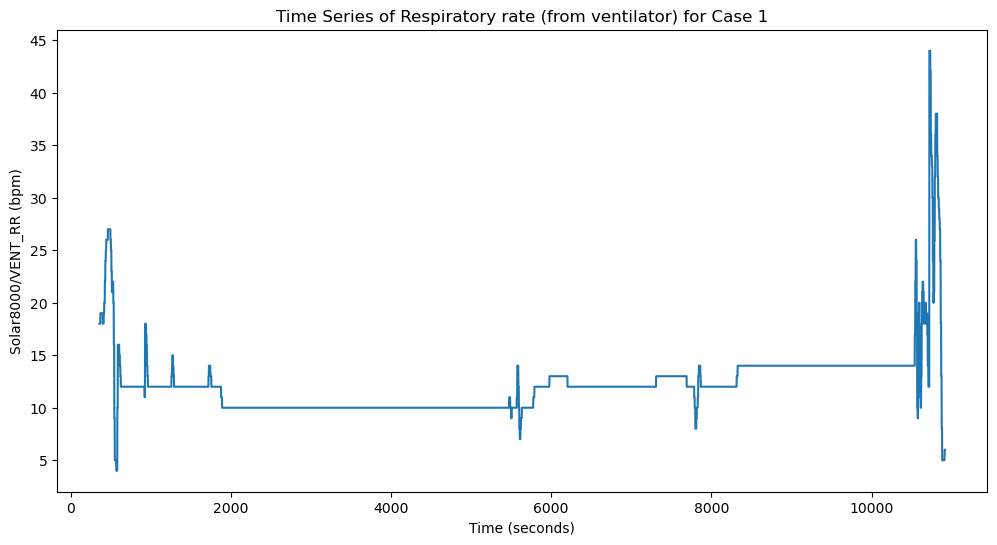

In [13]:
# Drop rows with NaN values in the 'Time' column
test_df_clean = test_df.dropna(subset=['Time'])

# Define x, y, and title based on the data
x = 'Time'
y = test_df_clean.columns[1]
title = f'Time Series of Respiratory rate (from ventilator) for Case 1'

# Create a timeseries plot
plt.figure(figsize=(12, 6))
sns.lineplot(data=test_df_clean, x=x, y=y)
plt.title(title)
plt.xlabel(x + " (seconds)")
plt.ylabel(y + " (bpm)")
plt.show()

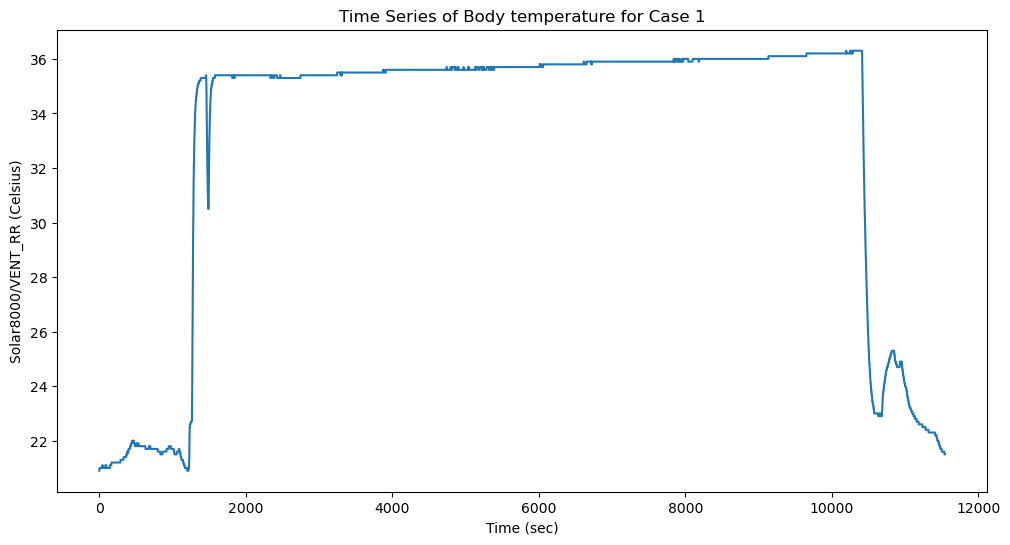

In [16]:
test_df2 = pd.read_csv('https://api.vitaldb.net/55488b14a4f2c1133273a3b8a897f7ee62b24ddc')

# Define x, y, and title based on the data
a = 'Time'
b = test_df2.columns[1]
title = f'Time Series of Body temperature for Case 1'

# Create a timeseries plot
plt.figure(figsize=(12, 6))
sns.lineplot(test_df2, x=a, y=b)
plt.title(title)
plt.xlabel(x + " (sec)")
plt.ylabel(y + " (Celsius)")
plt.show()